# Start of program

In [51]:
from functions import *
#from get_field import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

platform = plt.imread('platform1.png')

Input:

In [58]:
# Code should run for how many loops:
run_time = 30
# Between how many ped should be added per timestamp
ped_add_min = 0.1
ped_add_max = 0.5

In [59]:
ped_list = []
plotting_list = []
c = 0

df = pd.DataFrame(columns = ['timestamp', 'ped', 'x', 'y'])
#df.set_index(['timestamp', 'ped'], inplace=True)
df

,timestamp,ped,x,y


In [60]:
for t in range(0, run_time):
    try:
        ped_list, c = generate_ped(c, ped_list, ped_add_min, ped_add_max)
        if t == 0:
            first = ped_list.copy()
        if t == int(run_time/2):
            half_way = ped_list.copy()
        field_list = get_field(ped_list)
        for ped in range(0, len(ped_list)):
            df = df.append({'timestamp' : t, 'ped': ped, 'x' : ped_list[ped][1][0], 'y' : ped_list[ped][1][1]}, ignore_index=True)
            probabilities = get_prob(ped_list, ped, field_list)
            decided_square = make_decision(probabilities)
            move_ped(ped_list, ped, decided_square)
    except:
        pass
        

In [61]:
unique_ped = np.unique(df.ped)
unique_ped


array([0, 1], dtype=object)

In [62]:
df

,timestamp,ped,x,y
0,4,0,2,14
1,5,0,3,14
2,6,0,3,13
3,7,0,2,13
4,8,0,2,13
5,9,0,3,14
6,9,1,10,7
7,10,0,4,14
8,10,1,10,7
9,11,0,5,15


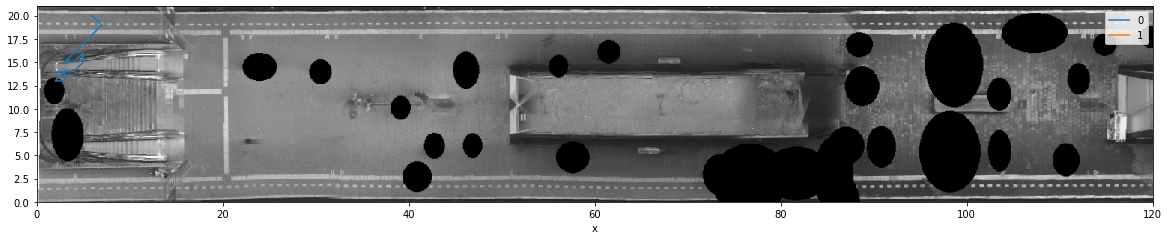

In [63]:
# plot a fugure:
fig = plt.figure(figsize = (20,10))
#plot axes
ax  = fig.add_subplot(111)
ax.imshow(platform, extent=[0,120, 0,21])

for i in unique_ped:
  df.query('ped == @i').plot('x', 'y', ax=ax, label=str(i))

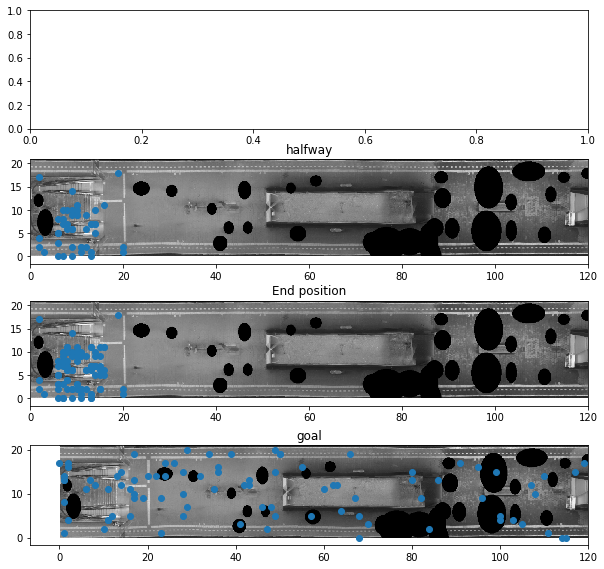

In [23]:
fig, ax = plt.subplots(4, figsize = (10,10))
platform = plt.imread('platform1.png')

#array_first = np.array(first)
array_halfway = np.array(half_way)
array_end = np.array(ped_list)

#ax[0].imshow(platform, extent=[0,120, 0,21])
#ax[0].set_title('start')
#ax[0].scatter(x=array_first[:,1,1], y=array_first[:,1,0])

ax[1].imshow(platform, extent=[0,120, 0,21])
ax[1].set_title('halfway')
ax[1].scatter(x=array_halfway[:,1,1], y=array_halfway[:,1,0])

ax[2].imshow(platform, extent=[0,120, 0,21])
ax[2].set_title('End position')
ax[2].scatter(x=array_end[:,1,1], y=array_end[:,1,0])

ax[3].imshow(platform, extent=[0,120, 0,21])
ax[3].set_title('goal')
ax[3].scatter(x=array_end[:,0,0], y=array_end[:,0,1])

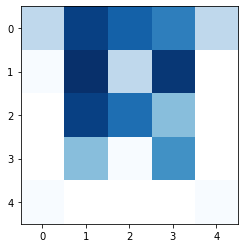

In [24]:
H, xedges, yedges = np.histogram2d(array_end[:,1,1], array_end[:,1,0], bins=(5))
H = H.T
platform = plt.imread('platform1.png')

#fig = plt.plot(frameon=False)#figsize=(22, 3))

#platform = plt.imshow(platform, extent=[0,120, 0,21])
plt.imshow(H, cmap = 'Blues', norm = LogNorm())#,  extent=[0,120, 0,21])
#plt.show()
#ax.imshow(H, norm = LogNorm())
#fig, ax = plt.subplots(figsize=(22, 3))
#ax.imshow(H,cmap = 'Blues',norm = LogNorm())
#tight_layout()

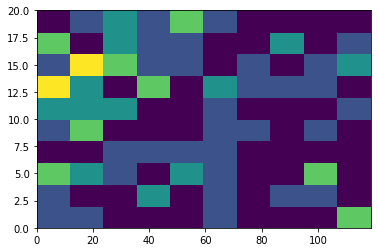

In [25]:
#ax.imshow(platform, extent=[0,120, 0,21])
plt.hist2d(array_end[:,0,0], array_end[:,0,1], bins=10);


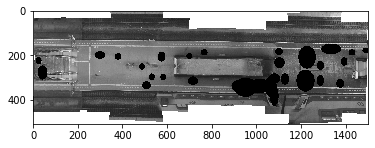

In [26]:
img = plt.imread('platform.png')
fig, ax = plt.subplots()
ax.imshow(img)